Discarded cluster(s): 0
No. of clusters:  5
Cluster  1  =  [[26], [24], [21]]
Cluster  2  =  [[83], [85]]
Cluster  3  =  [[73]]
Cluster  4  =  [[59], [52], [60]]
Cluster  5  =  [[2]]


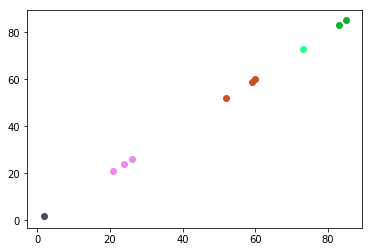

In [2]:
#importing some useful packages
import matplotlib.pyplot as plt
import numpy as np
#import math
from numpy.random import rand

%matplotlib inline

#MY_DBSCAN : a custom DBSCAN algorithm implementation for 1D values only
class DBSCAN_1D:

    # 1D distance
    def distance_1D(self, num1, num2):
        return abs(num1 - num2)
        
    def regionQuery(self, P):
        neighbourPts = []
        for point in self.D:
            if point not in self.visited:
                if self.distance_1D(P[0],point[0])<self.eps:
                    neighbourPts.append(point)

        return neighbourPts

    def inAnyCluster(self, point):
        for cluster in self.C:
            if point in cluster:
                return True
        return False
            
    def expandCluster(self, P, neighbourPts):
        # first append the current point to this new cluster
        # self.C[self.c_n].append(P)
        # for each of the points in the neighbourhood

        for point in neighbourPts:
            if point not in self.visited:
                self.visited.append(point)
                neighbourPts_2 = self.regionQuery(point)
                
                #if len(neighbourPts_2) >= self.MinPts:
                # adds all the neighbours to the list of neighbours
                # this includes previous points already in the list potentially, but we don't care
                # as those will be filtered by the visited list
                neighbourPts += neighbourPts_2 
                # adds the point to the cluster if not in any cluster yet
                if not self.inAnyCluster(point):
                    #print("Adding ", point, " to the cluster ", self.C[self.c_n])
                    self.C[self.c_n].append(point)
                

    def plot_clusters(self):
        print ("Discarded cluster(s):", len(self.noise))
        count = 0
        for noise_cluster in self.noise:
            count = count +1
            print("Discarded cluster ", count, " = ", noise_cluster)
            
        
        print ("No. of clusters: " , len(self.C))
        count = 0
        for cluster in self.C:
            col =[rand(1),rand(1),rand(1)]
            count = count +1 #print (cluster)
            plt.scatter([i[0] for i in cluster],[i[0] for i in cluster],color=col)
            print("Cluster ", count, " = ", cluster)
        plt.show()
        

    
    def __init__(self,D,eps,MinPts):
        self.D = D
        self.eps = eps
        self.MinPts = MinPts
        self.noise = []
        self.visited = []
        self.C = []
        self.c_n = -1
        
        # run through all the points in the data
        for point in D:
            self.visited.append(point) #marking point as visited
            
            # gets all the neighbouring points within the distance defined by eps
            neighbourPts = self.regionQuery(point)

            if not self.inAnyCluster(point):
                self.C.append([])
                self.c_n+=1
                #print("Adding ", point, " to the cluster ", self.C[self.c_n])
                self.C[self.c_n].append(point)
                # see if we can expand the cluster further by adding points 
                # until there is a gap of eps
                self.expandCluster(point, neighbourPts)
            # point was completely expanded and cluster is complete
            
            # if the length of the cluster is not long enough discard it
            if len(self.C[self.c_n]) < (self.MinPts):
                self.noise.append(self.C[self.c_n])
                del(self.C[self.c_n])
                self.c_n-=1
        
        self.plot_clusters()
        

#Test MY_DBSCAN
#eps = input("enter eps")
num_elements = 10
eps = 10
MinPts = 1
x=(100*rand(num_elements))
l=[]
for i in range(num_elements):
     l.append([int(x[i])])

#l = [[1],[5],[22],[54],[56]]
my_dbscan = DBSCAN_1D(l,eps,MinPts)